In [4]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot  as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import math
import time
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter,Layout

plotly.offline.init_notebook_mode(connected=True)


In [5]:
data=pd.read_json('tops_fashion.json')

In [6]:
print('No.of data points:',data.shape[0])
print('No.of features/variables:',data.shape[1])

No.of data points: 183138
No.of features/variables: 19


In [7]:
data.columns

Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')

In [8]:
data=data[['asin','brand','color','medium_image_url','product_type_name','title','formatted_price']]

In [9]:
print('No.of data points:',data.shape[0])
print('No.of features/variables:',data.shape[1])

No.of data points: 183138
No.of features/variables: 7


In [10]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None
1,B01N49AI08,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,None
2,B01JDPCOHO,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Won Top,None
3,B01N19U5H5,Focal18,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26


In [11]:
#data cleaning
print(data['product_type_name'].describe())

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


In [12]:
print(data['product_type_name'].unique())

['SHIRT' 'SWEATER' 'APPAREL' 'OUTDOOR_RECREATION_PRODUCT'
 'BOOKS_1973_AND_LATER' 'PANTS' 'HAT' 'SPORTING_GOODS' 'DRESS' 'UNDERWEAR'
 'SKIRT' 'OUTERWEAR' 'BRA' 'ACCESSORY' 'ART_SUPPLIES' 'SLEEPWEAR'
 'ORCA_SHIRT' 'HANDBAG' 'PET_SUPPLIES' 'SHOES' 'KITCHEN' 'ADULT_COSTUME'
 'HOME_BED_AND_BATH' 'MISC_OTHER' 'BLAZER' 'HEALTH_PERSONAL_CARE'
 'TOYS_AND_GAMES' 'SWIMWEAR' 'CONSUMER_ELECTRONICS' 'SHORTS' 'HOME'
 'AUTO_PART' 'OFFICE_PRODUCTS' 'ETHNIC_WEAR' 'BEAUTY'
 'INSTRUMENT_PARTS_AND_ACCESSORIES' 'POWERSPORTS_PROTECTIVE_GEAR' 'SHIRTS'
 'ABIS_APPAREL' 'AUTO_ACCESSORY' 'NONAPPARELMISC' 'TOOLS' 'BABY_PRODUCT'
 'SOCKSHOSIERY' 'POWERSPORTS_RIDING_SHIRT' 'EYEWEAR' 'SUIT'
 'OUTDOOR_LIVING' 'POWERSPORTS_RIDING_JACKET' 'HARDWARE' 'SAFETY_SUPPLY'
 'ABIS_DVD' 'VIDEO_DVD' 'GOLF_CLUB' 'MUSIC_POPULAR_VINYL'
 'HOME_FURNITURE_AND_DECOR' 'TABLET_COMPUTER' 'GUILD_ACCESSORIES'
 'ABIS_SPORTS' 'ART_AND_CRAFT_SUPPLY' 'BAG' 'MECHANICAL_COMPONENTS'
 'SOUND_AND_RECORDING_EQUIPMENT' 'COMPUTER_COMPONENT' 'JEWELRY'
 'B

In [13]:
product_type_count=Counter(list(data['product_type_name']))

In [14]:
product_type_count.most_common(10)

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

In [15]:
print(data['brand'].describe())

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object


In [16]:
brand_count=Counter(list(data['brand']))

In [17]:
brand_count.most_common(10)

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]

In [18]:
print(data['color'].describe())

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object


In [19]:
color_count=Counter(list(data['color']))

In [20]:
color_count.most_common(10)

[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

In [21]:
print(data['formatted_price'].describe())

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object


In [22]:
price_count=Counter(list(data['formatted_price']))

In [23]:
price_count.most_common(10)

[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]

In [24]:
print(data['title'].describe())

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object


In [25]:
title_count=Counter(list(data['title']))

In [26]:
title_count.most_common(10)

[('Nakoda Cotton Self Print Straight Kurti For Women', 77),
 ("Q-rious Women's Racerback Cotton Lycra Camsioles", 56),
 ('FINEJO Casual Women Long Sleeve Lace Irregular Hem Blouse Tops', 47),
 ('Girlzwalk Women Cami Sleeveless Printed Swing Vest Top Plus Sizes', 44),
 ("ELINA FASHION Women's Indo-Western Tunic Top Cotton Kurti", 43),
 ('Victoria Scoop Neck Front Lace Floral High-Low Top in 4 Sizes', 40),
 ("Cenizas Women's Indian Tunic Top Cotton Kurti", 39),
 ('Indistar Womens Premium Cotton Half Sleeves Printed T-Shirts/Tops (Pack of 3)',
  37),
 ("Rajnandini Women's Cotton Printed Kurti", 35),
 ('Long Sleeve Mock Neck Top', 32)]

In [27]:
data.to_pickle('pickels/180k_apparel_data')

In [28]:
data=data.loc[~data['formatted_price'].isnull()]
print(data.shape[0])

28395


In [29]:
data=data.loc[~data['color'].isnull()]
print(data.shape[0])

28385


In [30]:
data.to_pickle('pickels/28k_apparel_data')

In [31]:
#removing near duplicate items
data=pd.read_pickle('pickels/28k_apparel_data')
print(sum(data.duplicated('title')))

2325


In [32]:
 #remove short titles
data_sorted=data[data['title'].apply(lambda x:len(x.split())>4)]

In [33]:
data_sorted.shape[0]

27949

In [34]:
data_sorted.sort_values('title',inplace=True,ascending=False)

In [35]:
data_sorted.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
61973,B06Y1KZ2WB,Éclair,Black/Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,Éclair Women's Printed Thin Strap Blouse Black...,$24.99
133820,B010RV33VE,xiaoming,Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Womens Sleeveless Loose Long T-shirts...,$18.19
81461,B01DDSDLNS,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Women's White Long Sleeve Single Brea...,$21.58
75995,B00X5LYO9Y,xiaoming,Red Anchors,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Stripes Tank Patch/Bear Sleeve Anchor...,$15.91
151570,B00WPJG35K,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Sleeve Sheer Loose Tassel Kimono Woma...,$14.32


In [36]:
#remove same products with different colors,size
import itertools
indices=[]
for i,row in data_sorted.iterrows():
    indices.append(i)
stage1_dedupe_asins=[]
i=0
j=0
num_data_points=data_sorted.shape[0]
while i<num_data_points and j<num_data_points:
    previous_i=i
    a=data['title'].loc[indices[i]].split()
    j=i+1
    while j<num_data_points:
        b=data['title'].loc[indices[j]].split()
        length=max(len(a),len(b))
        count=0
        for k in itertools.zip_longest(a,b):
            if(k[0]==k[1]):
                count+=1
        if(length-count)>2:
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])
            if j==num_data_points-1:stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[j]])
            i=j
            break
        else:
            j+=1
    if previous_i==i:
        break


In [37]:
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]

In [38]:
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]

In [39]:
data.to_pickle('pickels/17k_apperal_data')

In [40]:
data.to_pickle('pickels/16k_apperal_data')


In [41]:
data = pd.read_pickle('pickels/16k_apperal_data')

In [42]:
stop_words=set(stopwords.words('english'))

In [43]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [44]:
def nlp_preprocessing(total_text,index,column):
    if type(total_text) is not int:
        string=""
        for words in total_text.split():
            word=("".join(e for e in words if e.isalnum()))
            word=word.lower()
            if not word in stop_words:
                string+=word+" "
        data[column][index]=string

In [45]:
for index,row in data.iterrows():
    nlp_preprocessing(row['title'],index,'title')


In [46]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,$7.39
43,B0079BMKDS,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,APPAREL,featherlite ladies silky smooth pique white xl,$13.53


In [47]:
data.to_pickle('pickels/16k_apperal_data_preprocessed')

In [48]:
#stemming
from nltk.stem.porter import *
stemmer=PorterStemmer()


In [49]:
data = pd.read_pickle('pickels/16k_apperal_data_preprocessed')
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics wor...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,$20.54
27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,supernatural chibis sam dean castiel neck tshi...,$7.39
43,B0079BMKDS,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,APPAREL,featherlite ladies silky smooth pique white xl,$13.53


In [50]:
#display an image
def display_img(url,ax,fig):
    response=requests.get(url)
    img=Image.open(BytesIO(response.content))
    plt.imshow(img)

In [51]:
def plot_heatmap(keys,values,labels,url,text):
    gs=gridspec.GridSpec(2,2,width_ratios=[4,1],height_ratios=[4,1])
    fig=plt.figure(figsize=(25,3))
    ax=plt.subplot(gs[0])
    ax=sns.heatmap(np.array([values]),annot=np.array([labels]))
    ax.set_xticklabels(keys)
    ax.set_title(text)
    ax=plt.subplot(gs[1])
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    display_img(url,ax,fig)
    plt.show()

In [52]:
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    keys = list(vec2.keys())
    values = [vec2[x] for x in vec2.keys()]
    
    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, url, text)

    

In [53]:
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}


In [54]:
def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    vector1 = text_to_vector(text1)
    vector2 = text_to_vector(text2)
    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(data['title'])
title_features.get_shape() # get number of rows and columns in feature matrix.


(17593, 12927)

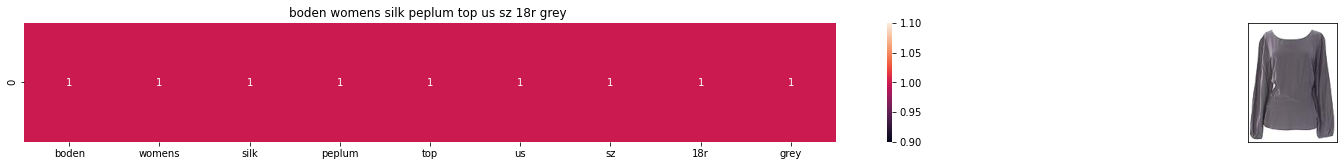

ASIN : B01H62TZX2
Brand: BODEN
Title: boden womens silk peplum top us sz 18r grey 
Euclidean similarity with the query image : 0.0


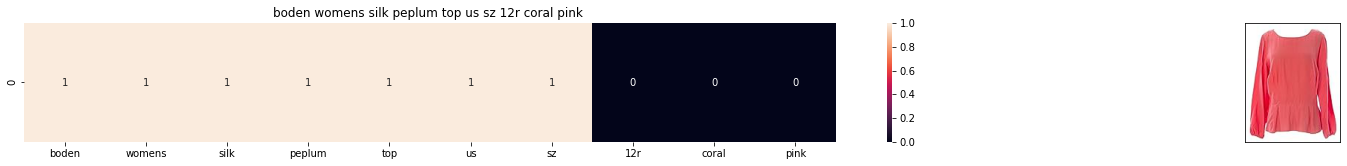

ASIN : B01H62U0CM
Brand: BODEN
Title: boden womens silk peplum top us sz 12r coral pink 
Euclidean similarity with the query image : 2.23606797749979


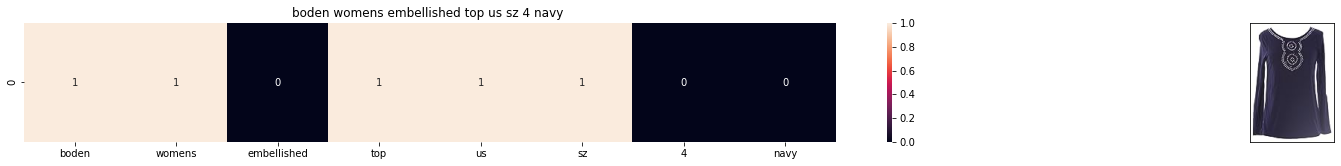

ASIN : B01H62T4Y2
Brand: BODEN
Title: boden womens embellished top us sz 4 navy 
Euclidean similarity with the query image : 2.449489742783178


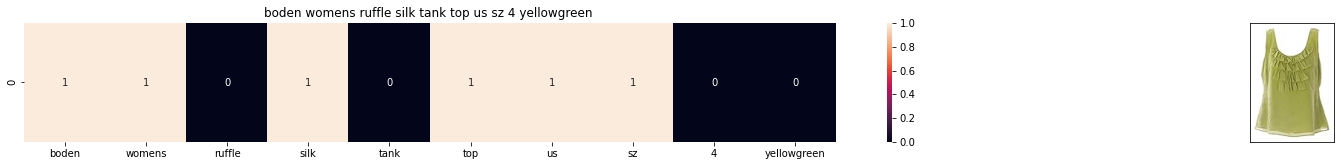

ASIN : B01H62TL1S
Brand: BODEN
Title: boden womens ruffle silk tank top us sz 4 yellowgreen 
Euclidean similarity with the query image : 2.449489742783178


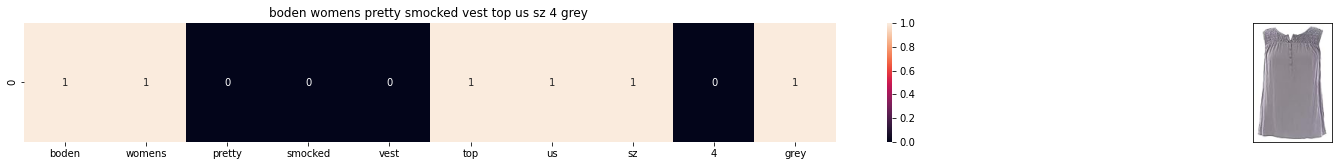

ASIN : B01H62TGWW
Brand: BODEN
Title: boden womens pretty smocked vest top us sz 4 grey 
Euclidean similarity with the query image : 2.449489742783178


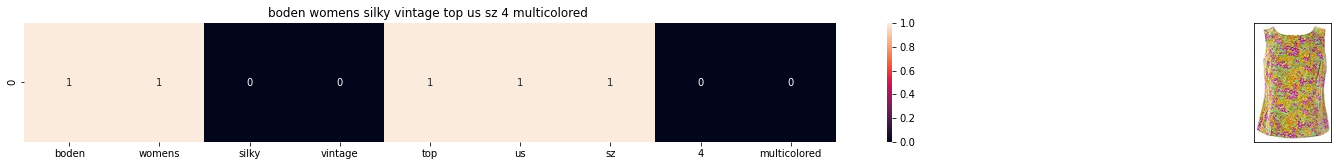

ASIN : B01H62TKG4
Brand: BODEN
Title: boden womens silky vintage top us sz 4 multicolored 
Euclidean similarity with the query image : 2.6457513110645907


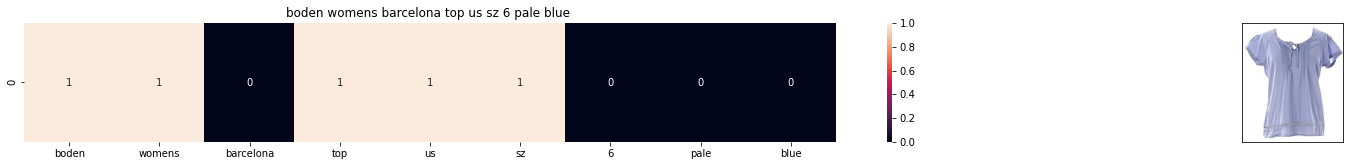

ASIN : B01H62TVK4
Brand: BODEN
Title: boden womens barcelona top us sz 6 pale blue 
Euclidean similarity with the query image : 2.6457513110645907


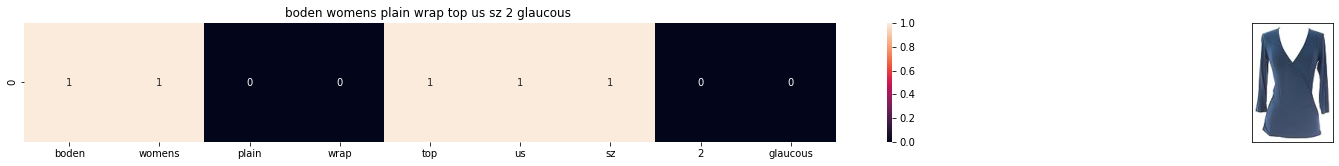

ASIN : B01H62T5QO
Brand: BODEN
Title: boden womens plain wrap top us sz 2 glaucous 
Euclidean similarity with the query image : 2.6457513110645907


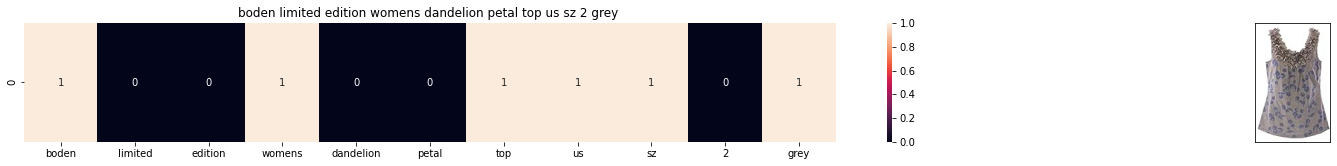

ASIN : B01H62TJME
Brand: BODEN
Title: boden limited edition womens dandelion petal top us sz 2 grey 
Euclidean similarity with the query image : 2.6457513110645907


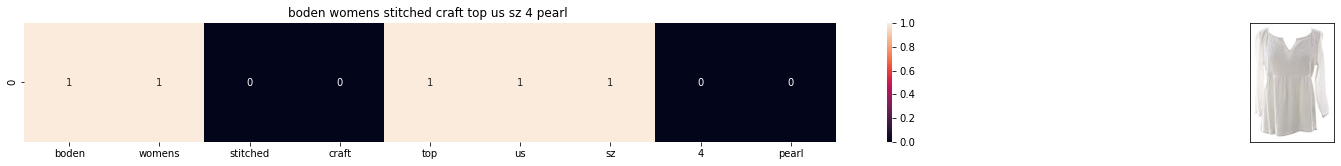

ASIN : B01JN90OMW
Brand: BODEN
Title: boden womens stitched craft top us sz 4 pearl 
Euclidean similarity with the query image : 2.6457513110645907


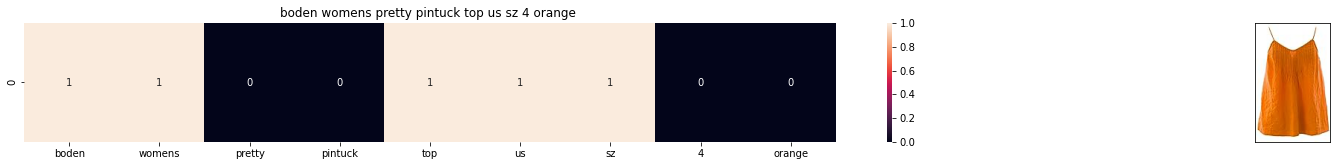

ASIN : B01JN910QG
Brand: BODEN
Title: boden womens pretty pintuck top us sz 4 orange 
Euclidean similarity with the query image : 2.6457513110645907


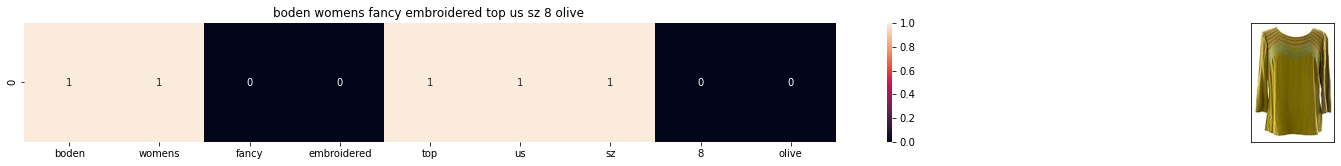

ASIN : B01JMB1TWU
Brand: BODEN
Title: boden womens fancy embroidered top us sz 8 olive 
Euclidean similarity with the query image : 2.6457513110645907


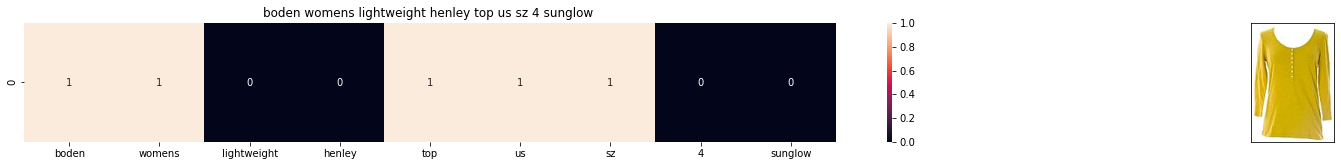

ASIN : B01H62T4M4
Brand: BODEN
Title: boden womens lightweight henley top us sz 4 sunglow 
Euclidean similarity with the query image : 2.6457513110645907


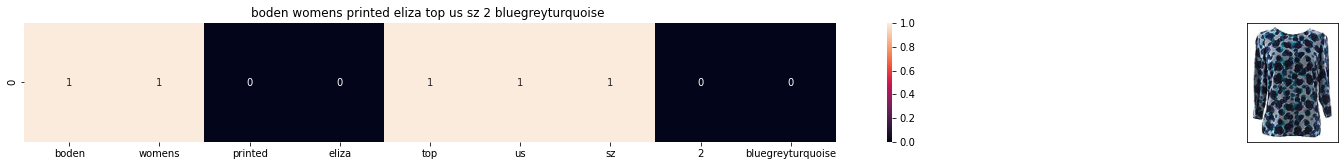

ASIN : B01JN90ETA
Brand: BODEN
Title: boden womens printed eliza top us sz 2 bluegreyturquoise 
Euclidean similarity with the query image : 2.6457513110645907


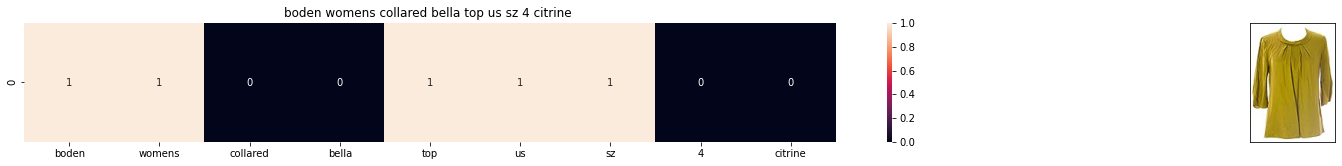

ASIN : B01H62T75S
Brand: BODEN
Title: boden womens collared bella top us sz 4 citrine 
Euclidean similarity with the query image : 2.6457513110645907


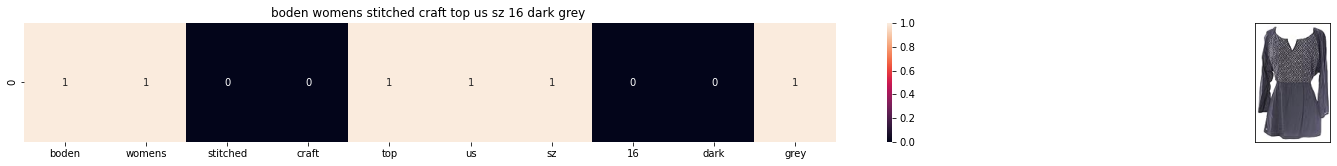

ASIN : B01H62T91U
Brand: BODEN
Title: boden womens stitched craft top us sz 16 dark grey 
Euclidean similarity with the query image : 2.6457513110645907


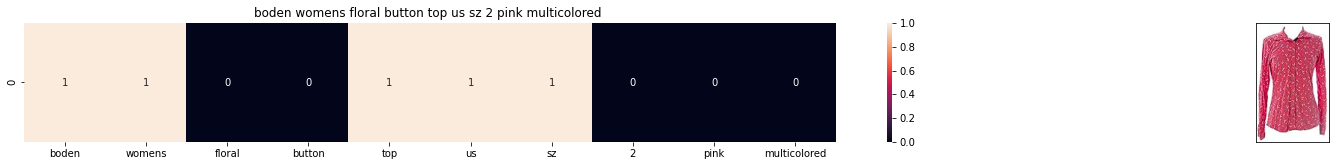

ASIN : B01H62U1O4
Brand: BODEN
Title: boden womens floral button top us sz 2 pink multicolored 
Euclidean similarity with the query image : 2.8284271247461903


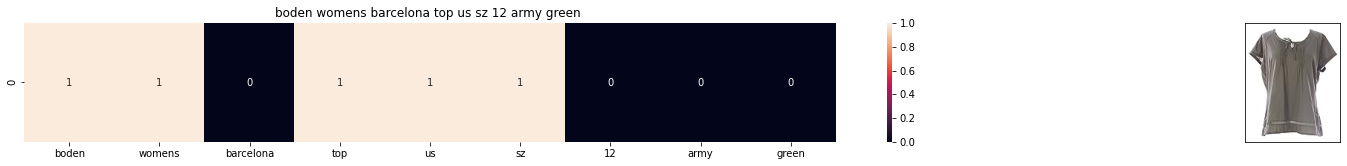

ASIN : B01H62TTK6
Brand: BODEN
Title: boden womens barcelona top us sz 12 army green 
Euclidean similarity with the query image : 2.8284271247461903


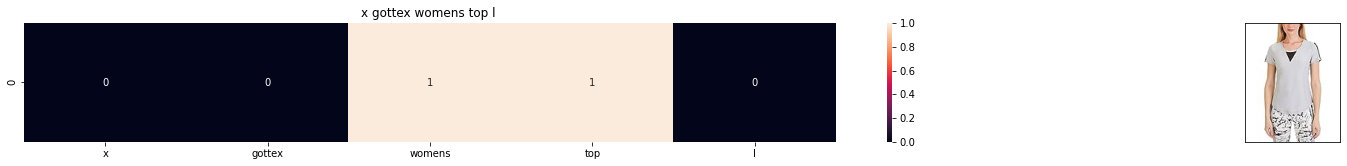

ASIN : B073M78XLP
Brand: X by Gottex
Title: x gottex womens top l 
Euclidean similarity with the query image : 2.8284271247461903


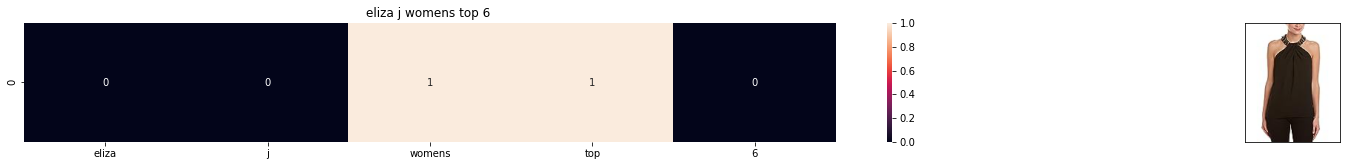

ASIN : B01M9FEO82
Brand: Eliza J
Title: eliza j womens top 6 
Euclidean similarity with the query image : 2.8284271247461903


In [59]:
def bag_of_words_model(doc_id, num_results):
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])
    
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)

bag_of_words_model(12563, 20)